In [255]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
import re
import emoji
from langdetect import detect
import time
from langdetect.lang_detect_exception import LangDetectException
from googletrans import Translator

In [256]:
data = pd.read_csv('repositories.csv')

In [257]:
display(data.head(30))

,id,full_name,url,language,license,topics,owner_type,description,stars_count,forks,issues_count,year,created_at,updated_at
0,631962458,bigcode-project/starcoder,https://github.com/bigcode-project/starcoder,Python,Apache License 2.0,[],Organization,Home of StarCoder: fine-tuning & inference!,5427,344,39,2023,2023-04-24T12:32:21Z,2023-06-23T06:40:59Z
1,631993417,novicezk/midjourney-proxy,https://github.com/novicezk/midjourney-proxy,Java,Apache License 2.0,"['midjourney', 'midjourney-api']",User,代理 MidJourney 的discord频道，实现api形式调用AI绘图,1601,666,79,2023,2023-04-24T13:43:45Z,2023-06-23T07:46:54Z
2,631957497,GFW-knocker/gfw_resist_tls_proxy,https://github.com/GFW-knocker/gfw_resist_tls_proxy,Python,GNU General Public License v3.0,[],User,knock up GFW sni detection in tls client hello,1453,243,56,2023,2023-04-24T12:20:11Z,2023-06-22T21:00:54Z
3,631998225,erictik/midjourney-client,https://github.com/erictik/midjourney-client,TypeScript,Apache License 2.0,"['midjourney', 'midjourney-client']",Organization,MidJourney client. Unofficial Node.js client,716,124,44,2023,2023-04-24T13:54:42Z,2023-06-23T08:11:00Z
4,631822812,yzfly/wonderful-prompts,https://github.com/yzfly/wonderful-prompts,NaN,MIT License,"['chatgpt', 'chatgpt3', 'gpt3-prompts', 'gpt3-turbo', 'gpt35', 'gpt4', 'openai', 'prompt-engineering', 'prompts']",User,🔥中文 prompt 精选🔥，ChatGPT 使用指南，提升 ChatGPT 可玩性和可用性！🚀,554,44,0,2023,2023-04-24T06:17:37Z,2023-06-22T20:19:04Z
5,631867864,Jumpat/SegmentAnythingin3D,https://github.com/Jumpat/SegmentAnythingin3D,Python,NaN,"['3d', '3d-segmentation', 'computer-vision', 'nerf', 'segment-anything', 'segmentation']",User,Segment Anything in 3D with NeRFs,395,20,2,2023,2023-04-24T08:24:39Z,2023-06-23T03:52:15Z
6,631814434,woop/rebuff,https://github.com/woop/rebuff,TypeScript,Apache License 2.0,"['llm', 'llmops', 'prompt-engineering', 'prompts', 'security']",User,Rebuff.ai - Prompt Injection Detector,338,12,15,2023,2023-04-24T05:49:09Z,2023-06-22T20:18:49Z
7,631755045,lucidrains/recurrent-memory-transformer-pytorch,https://github.com/lucidrains/recurrent-memory-transformer-pytorch,Python,MIT License,"['artificial-intelligence', 'attention-mechanisms', 'deep-learning', 'long-context', 'memory', 'recurrence', 'transformers']",User,"Implementation of Recurrent Memory Transformer, Neurips 2022 paper, in Pytorch",313,8,1,2023,2023-04-24T01:35:47Z,2023-06-22T20:29:46Z
8,632043405,stassius/StableHoudini,https://github.com/stassius/StableHoudini,Python,Apache License 2.0,"['automatic1111', 'houdini', 'stable-diffusion']",User,Stable Diffusion Houdini Toolset,274,33,0,2023,2023-04-24T15:35:36Z,2023-06-23T07:23:04Z
9,631752113,Kuingsmile/word-GPT-Plus,https://github.com/Kuingsmile/word-GPT-Plus,Vue,MIT License,"['chatgpt', 'copilot', 'office', 'office365', 'openai', 'word']",User,Word GPT Plus is a word add-in which integrates the chatGPT model into Microsoft Word. Both official and web api is supported.,259,40,1,2023,2023-04-24T01:22:51Z,2023-06-22T09:13:56Z


In [258]:
print(data.shape[0])

30096


In [259]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30096 entries, 0 to 30095
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30096 non-null  int64 
 1   full_name     30096 non-null  object
 2   url           30096 non-null  object
 3   language      23790 non-null  object
 4   license       13030 non-null  object
 5   topics        30096 non-null  object
 6   owner_type    30096 non-null  object
 7   description   20249 non-null  object
 8   stars_count   30096 non-null  int64 
 9   forks         30096 non-null  int64 
 10  issues_count  30096 non-null  int64 
 11  year          30096 non-null  int64 
 12  created_at    30096 non-null  object
 13  updated_at    30096 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
None


# Correction les erreurs du format

In [260]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])
print(data.dtypes)

id                            int64
full_name                    object
url                          object
language                     object
license                      object
topics                       object
owner_type                   object
description                  object
stars_count                   int64
forks                         int64
issues_count                  int64
year                          int64
created_at      datetime64[ns, UTC]
updated_at      datetime64[ns, UTC]
dtype: object


In [261]:
valeurs_manquantes= data.isnull().sum()
display(valeurs_manquantes)

id                  0
full_name           0
url                 0
language         6306
license         17066
topics              0
owner_type          0
description      9847
stars_count         0
forks               0
issues_count        0
year                0
created_at          0
updated_at          0
dtype: int64

<Axes: >

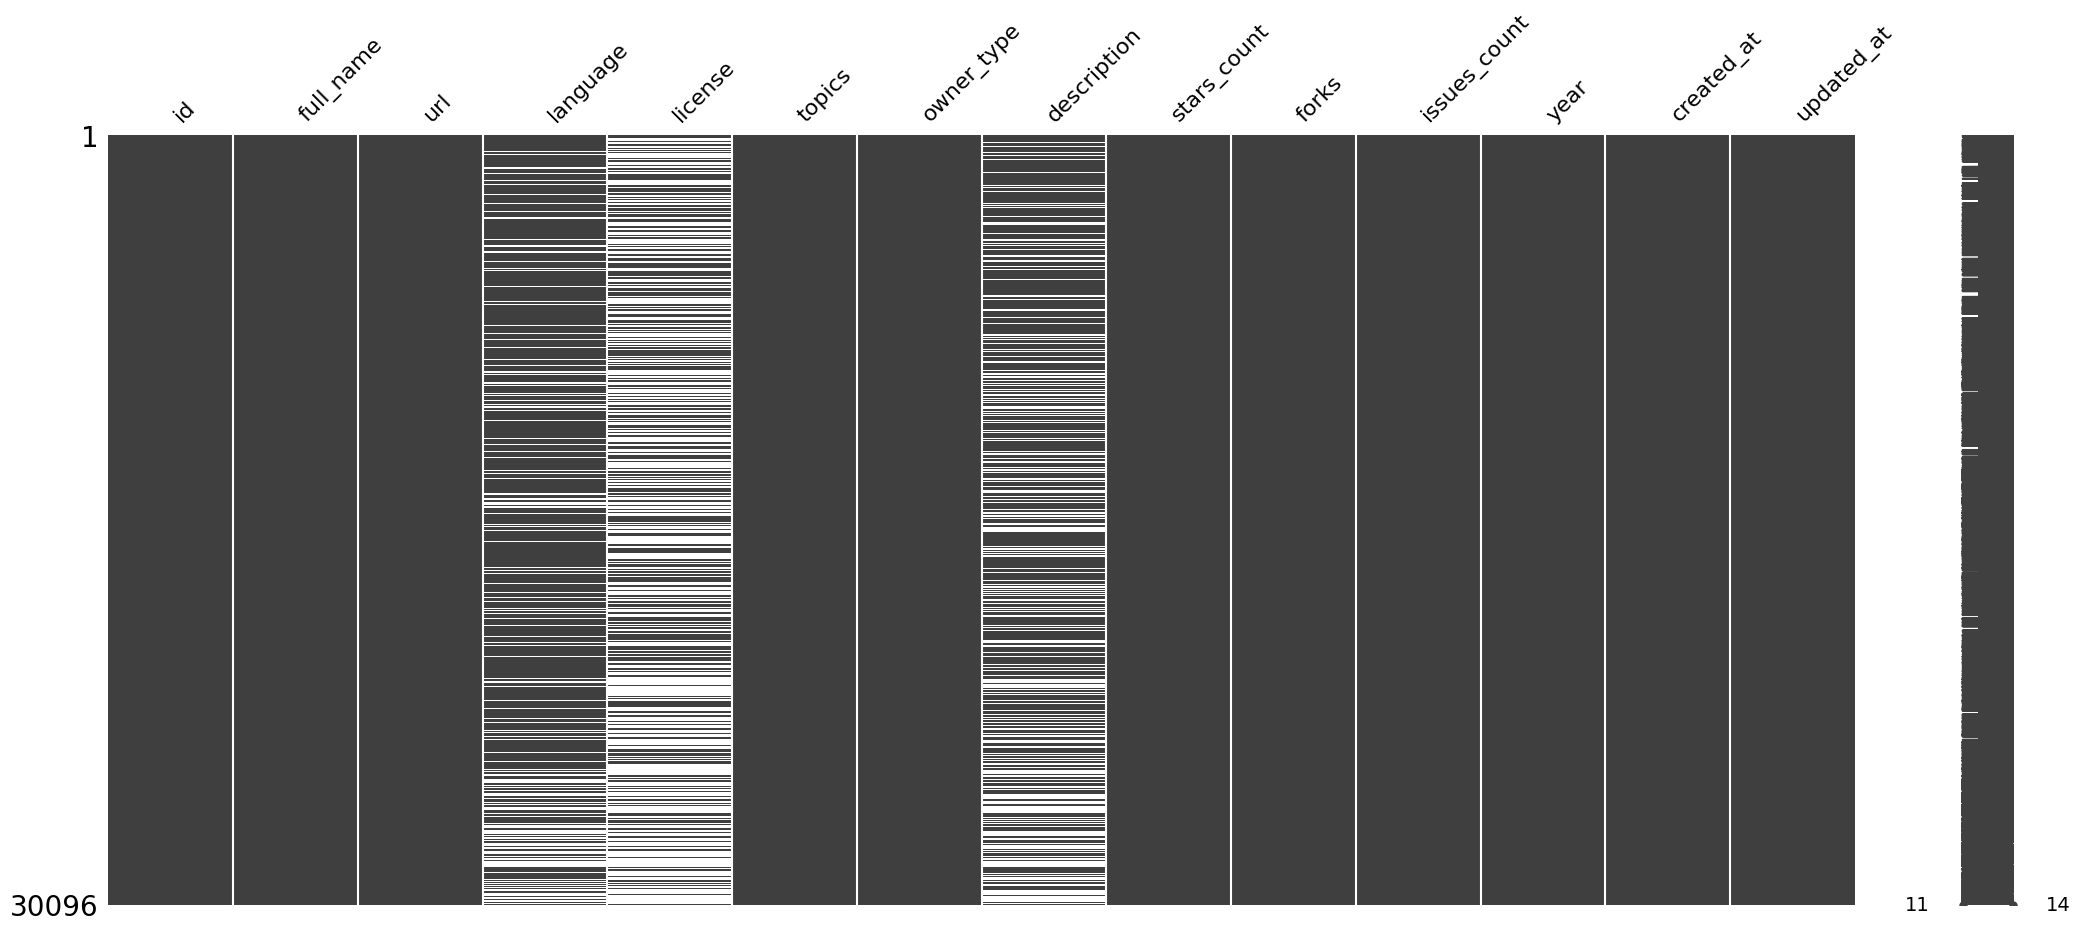

In [262]:
msno.matrix(data)

# La suppression de les valeurs manquent

In [263]:
data.dropna(subset=['language'], inplace=True)


In [264]:
# La suppression de les valeurs manquent
valeurs_redondants  = data.duplicated().sum()
display(valeurs_redondants)

60

# La suppression de les valeurs redondants

In [265]:
data.drop_duplicates(inplace=True)

# Les valeurs aberrantes

In [266]:
data[['stars_count','forks','issues_count']].describe()

,stars_count,forks,issues_count
count,23730.000000,23730.000000,23730.000000
mean,31.127560,4.411757,1.120733
std,360.356726,60.445003,7.251208
min,2.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000
75%,13.000000,2.000000,0.000000
max,31236.000000,4823.000000,584.000000


In [267]:
display(data.loc[data['stars_count'] > 10000]) 

,id,full_name,url,language,license,topics,owner_type,description,stars_count,forks,issues_count,year,created_at,updated_at
2500,634224458,AntonOsika/gpt-engineer,https://github.com/AntonOsika/gpt-engineer,Python,MIT License,[],User,"Specify what you want it to build, the AI asks for clarification, and then builds it.",30342,4823,62,2023,2023-04-29 12:52:15+00:00,2023-06-23 08:16:26+00:00
2501,634081686,mlc-ai/mlc-llm,https://github.com/mlc-ai/mlc-llm,Python,Apache License 2.0,"['language-model', 'llm', 'machine-learning-compilation', 'tvm']",Organization,"Enable everyone to develop, optimize and deploy AI models natively on everyone's devices.",10070,669,62,2023,2023-04-29 01:59:25+00:00,2023-06-23 05:25:52+00:00
4000,635240594,imartinez/privateGPT,https://github.com/imartinez/privateGPT,Python,Apache License 2.0,[],User,"Interact privately with your documents using the power of GPT, 100% privately, no data leaks",31236,3706,361,2023,2023-05-02 09:15:31+00:00,2023-06-23 08:14:23+00:00
17000,646480766,s0md3v/roop,https://github.com/s0md3v/roop,Python,GNU Affero General Public License v3.0,"['ai', 'deepfake', 'deepfakes', 'face-swap']",User,one-click deepfake (face swap),13197,2327,11,2023,2023-05-28 14:37:54+00:00,2023-06-23 08:11:40+00:00


In [268]:
outlier_cols = ['stars_count', 'forks', 'issues_count']

for col in outlier_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    print(f"Intervalle aberrant pour la colonne '{col}': ({lower_bound}, {upper_bound})")

    outlier_count = data.loc[(data[col] < lower_bound) | (data[col] > upper_bound)].shape[0]
    print(f"Nombre de valeurs aberrantes dans la colonne '{col}': {outlier_count}")


Intervalle aberrant pour la colonne 'stars_count': (-9.5, 26.5)
Nombre de valeurs aberrantes dans la colonne 'stars_count': 2906
Intervalle aberrant pour la colonne 'forks': (-3.0, 5.0)
Nombre de valeurs aberrantes dans la colonne 'forks': 2309
Intervalle aberrant pour la colonne 'issues_count': (0.0, 0.0)
Nombre de valeurs aberrantes dans la colonne 'issues_count': 5552


Text(0, 0.5, 'Valeurs')

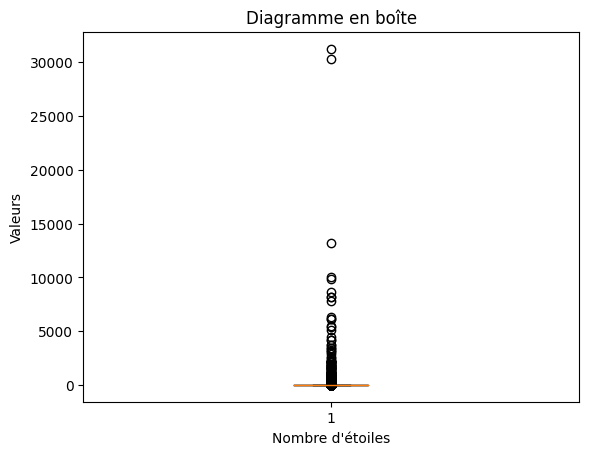

In [269]:
plt.boxplot(data['stars_count'])
plt.title('Diagramme en boîte')
plt.xlabel('Nombre d\'étoiles')
plt.ylabel('Valeurs')

Text(0, 0.5, 'valeurs')

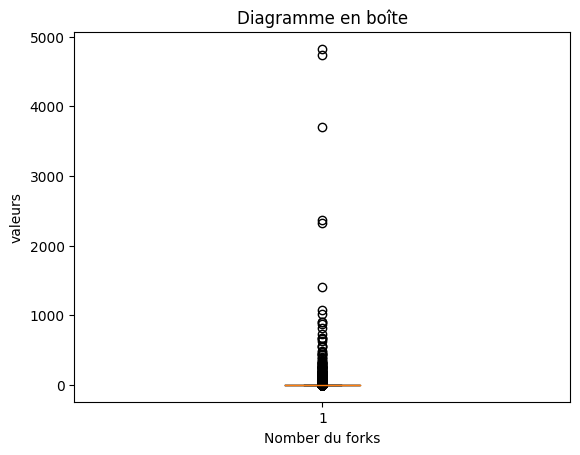

In [270]:
plt.boxplot(data['forks'])
plt.title('Diagramme en boîte')
plt.xlabel('Nomber du forks')
plt.ylabel('valeurs')

Text(0, 0.5, 'valeurs')

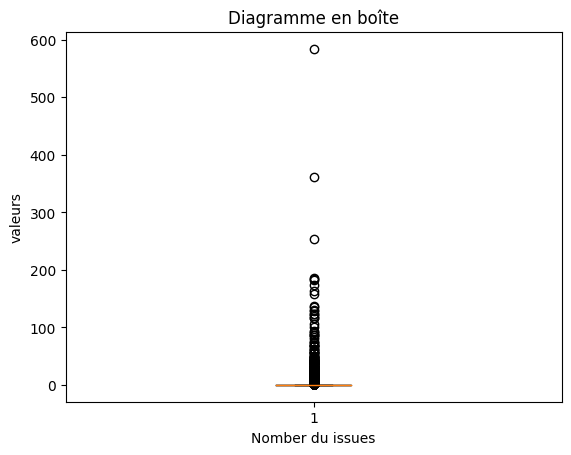

In [271]:
plt.boxplot(data['issues_count'])
plt.title('Diagramme en boîte')
plt.xlabel('Nomber du issues')
plt.ylabel('valeurs')

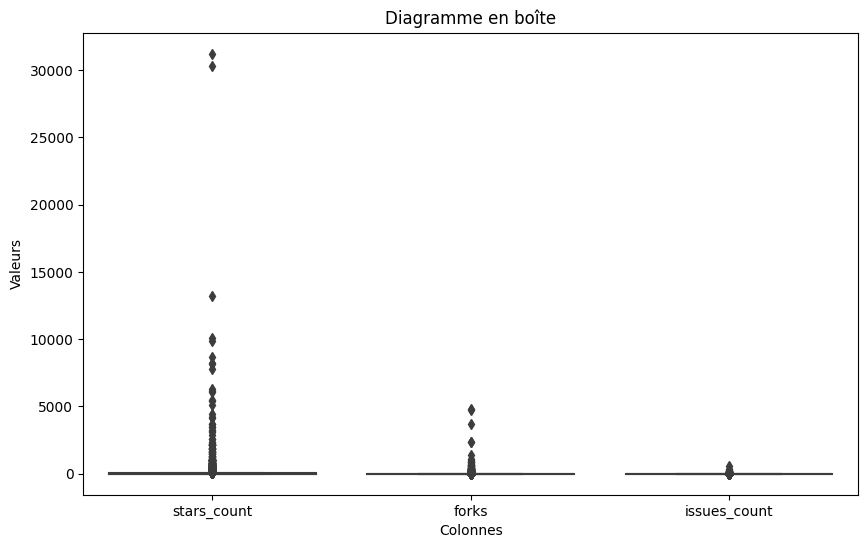

In [272]:
colonnes = ['stars_count','forks','issues_count']
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[colonnes])

plt.title('Diagramme en boîte')
plt.xlabel('Colonnes')
plt.ylabel('Valeurs')

plt.show()

In [273]:
distinct_languages = data['language'].unique().tolist()
display(distinct_languages)


['Python',
 'Java',
 'TypeScript',
 'Vue',
 'Jupyter Notebook',
 'PHP',
 'Julia',
 'JavaScript',
 'Go',
 'Lua',
 'Dart',
 'HCL',
 'Rust',
 'C++',
 'SCSS',
 'PowerShell',
 'GLSL',
 'C#',
 'Shell',
 'C',
 'Svelte',
 'GDScript',
 'Kotlin',
 'Nix',
 'Swift',
 'CSS',
 'Cuda',
 'HTML',
 'Solidity',
 'Clojure',
 'Assembly',
 'Elixir',
 'Logos',
 'Apex',
 'Ruby',
 'Makefile',
 'Pawn',
 'Scala',
 'Perl',
 'Erlang',
 'TeX',
 'R',
 'Game Maker Language',
 'MATLAB',
 'SAS',
 'V',
 'Emacs Lisp',
 'F#',
 'Cairo',
 'Nim',
 'Yacc',
 'Verilog',
 'Lean',
 'Haxe',
 'Common Lisp',
 'Batchfile',
 'Bicep',
 'Squirrel',
 'ShaderLab',
 'Haskell',
 'AutoHotkey',
 'Dockerfile',
 'OCaml',
 'Handlebars',
 'Blade',
 'Zig',
 'Smarty',
 'Vim Script',
 'PLpgSQL',
 'YASnippet',
 'Objective-C++',
 'Bluespec',
 'Jinja',
 'Astro',
 'Pascal',
 'TSQL',
 'MDX',
 'Roff',
 'Portugol',
 'Objective-C',
 'Odin',
 'CodeQL',
 'G-code',
 'Starlark',
 'Ballerina',
 'Visual Basic .NET',
 'Rich Text Format',
 'VHDL',
 'MQL5',
 'Wren',

In [274]:
print(len(distinct_languages))

185


In [275]:
languge_counts = data['language'].value_counts()
display(languge_counts.head(20))

language
Python              5634
JavaScript          3219
TypeScript          2605
HTML                1123
Jupyter Notebook    1090
Java                1003
C++                  934
Go                   885
C#                   811
Rust                 752
C                    549
PHP                  525
Shell                495
CSS                  485
Kotlin               375
Dart                 373
Lua                  309
Swift                298
Vue                  218
Solidity             139
Name: count, dtype: int64

## La relation entre "stars_count" (nombre d'étoiles) et les autres variables

In [276]:
# Colonnes cibles (variables à prédire)
colonnes_cibles = ['id', 'full_name', 'url', 'language', 'license', 'topics', 'year', 'created_at', 'owner_type', 'updated_at', 'stars_count', 'description']
X = data.drop(colonnes_cibles, axis=1)  
y = data['stars_count']  # Sélectionner la colonne cible pour la sélection des caractéristiques

# Sélectionner toutes les caractéristiques (k='all') ou réduire k pour correspondre au nombre de caractéristiques disponibles dans X
selecteur = SelectKBest(score_func=f_regression, k='all')
X_selectionnees = selecteur.fit_transform(X, y)

# Obtenir les caractéristiques sélectionnées et leurs scores correspondants
caracteristiques_selectionnees_stars = X.columns[selecteur.get_support()]
scores_caracteristiques_stars = selecteur.scores_

# Afficher les caractéristiques sélectionnées et leurs scores
for caracteristique, score in zip(caracteristiques_selectionnees_stars, scores_caracteristiques_stars):
    print(f"Caractéristique : {caracteristique}, Score : {score}")


Caractéristique : forks, Score : 49047.749820645295
Caractéristique : issues_count, Score : 3864.120356702967


## La relation entre "forks" et les autres variables

In [277]:
# Colonnes cibles (variables à prédire)
target_columns = ['id', 'full_name', 'url', 'language', 'license', 'topics', 'year', 'created_at', 'owner_type', 'updated_at', 'forks', 'description']
X = data.drop(target_columns, axis=1)
y = data['forks'] # Sélection de la colonne cible pour la sélection des caractéristiques

#Sélectionner toutes les caractéristiques (k='all') ou réduire k pour correspondre au nombre de caractéristiques disponibles dans X
selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X, y)

#Obtenir les caractéristiques sélectionnées et leurs scores correspondants
selected_features_forks = X.columns[selector.get_support()]
feature_scores_forks = selector.scores_

#Afficher les caractéristiques sélectionnées et leurs scores
for feature, score in zip(selected_features_forks, feature_scores_forks):
    print(f"Caractéristique : {feature}, Score : {score}")

Caractéristique : stars_count, Score : 49047.74982064652
Caractéristique : issues_count, Score : 3664.257175643329


## La relation entre "issues_count" et les autres variables. 

In [278]:
# Colonnes cibles (variables à prédire)
target_columns = ['id', 'full_name', 'url', 'language', 'license', 'topics', 'year','created_at','owner_type','updated_at','issues_count','description']
X = data.drop(target_columns, axis=1)
y = data['issues_count']  # Sélection de la colonne cible pour la sélection des caractéristiques

#Sélectionner toutes les caractéristiques (k='all') ou réduire k pour correspondre au nombre de caractéristiques disponibles dans X
selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X, y)

#Obtenir les caractéristiques sélectionnées et leurs scores correspondants
selected_features_issues = X.columns[selector.get_support()]
feature_scores_issues = selector.scores_

#Afficher les caractéristiques sélectionnées et leurs scores
for feature, score in zip(selected_features_issues, feature_scores_issues):
    print(f"Caractéristique : {feature}, Score : {score}")


Caractéristique : stars_count, Score : 3864.120356702959
Caractéristique : forks, Score : 3664.257175643335


## Standardisation des données

In [279]:
data["license"].fillna("NOT INCLUDED", inplace=True)

In [280]:
data["description"].fillna("NO DESCRIPTION", inplace=True)

In [281]:

# Remplacer les valeurs vides [] par "NO TOPIC" dans la colonne 'topics'
data['topics'] = data['topics'].apply(lambda x: 'NO TOPIC' if x == '[]' else x)

## Traduction de le description  en anglais

In [283]:
# Fonction pour détecter la langue de description 
def detect_language(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = 'unknown'
    return lang



# Détecter les langues distinctes dans le jeu de données
distinct_languages = data['description'].apply(detect_language).unique()

# Afficher les langues distinctes
for lang in distinct_languages:
    print(lang)


en
fr
zh-cn
de
no
da
lv
ko
unknown
ca
es
vi
tl
pt
nl
fa
et
ro
af
tr
hr
cy
it
id
ja
sk
sv
ru
pl
sw
fi
ar
so
lt
cs
bg
sl
uk
el
sq
th
hu
zh-tw
mk


In [286]:
# Function to detect the language of a text
def detect_language(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = 'unknown'
    return lang

# Function to translate text to English
def translate_to_english(text):
    if text == 'NO DESCRIPTION' or detect_language(text) == 'en':
        return text
    try:
        translator = Translator()
        translation = translator.translate(text, dest='en').text
        return translation
    except Exception as e:
        print(f"Translation error occurred: {e}")
        # Handle the error gracefully by returning the original text
        return text

# Apply translation to the 'description' column
total_rows = len(data)
batch_size = 25000
start_index = 0
end_index = batch_size

while start_index < total_rows:
    # Select a batch of descriptions
    batch = data['description'].iloc[start_index:end_index]
    
    # Translate the descriptions
    translated_batch = batch.apply(translate_to_english)
    
    # Update the translated descriptions in the original dataframe
    data.loc[start_index:end_index, 'description'] = translated_batch
    
    # Increment the indices for the next batch
    start_index += batch_size
    end_index += batch_size
    
    time.sleep(1)

# Print the updated descriptions
pd.set_option('display.max_colwidth', None)
print(data['description'])


0                                                          Home of StarCoder: fine-tuning & inference!
1                                                               代理 MidJourney 的discord频道，实现api形式调用AI绘图
2                                                      knock up GFW sni detection in tls client hello 
3                                                         MidJourney client. Unofficial Node.js client
5                                                                    Segment Anything in 3D with NeRFs
                                                     ...                                              
30078                                                                                   NO DESCRIPTION
30085                                                               Let's see where the flow takes us.
30087    An in-progress, fast, not-exactly-spec-friendly GNU C web browser, aimed at embedded systems.
30088                                                                    

## La suppression  de les emojis et les caractères spéciaux

In [287]:
def remove_emojis(text):
    if isinstance(text, str):
        # Supprimer les emojis en utilisant des expressions régulières
        pattern = re.compile("["
                             u"\U0001F600-\U0001F64F"  # émoticônes
                             u"\U0001F300-\U0001F5FF"  # symboles et pictogrammes
                             u"\U0001F680-\U0001F6FF"  # symboles de transport et de carte
                             u"\U0001F1E0-\U0001F1FF"  # drapeaux (iOS)
                             u"\U00002702-\U000027B0"
                             u"\U00002702-\U000027B0"
                             u"\U000024C2-\U0001F251"
                             u"\U0001f926-\U0001f937"
                             u"\U00010000-\U0010ffff"
                             u"\u2640-\u2642"
                             u"\u2600-\u2B55"
                             u"\u200d"
                             u"\u23cf"
                             u"\u23e9"
                             u"\u231a"
                             "]+", flags=re.UNICODE)
        return pattern.sub(r'', text)
    else:
        return ''


In [288]:
data['description'] = data['description'].apply(remove_emojis)

In [289]:
data

,id,full_name,url,language,license,topics,owner_type,description,stars_count,forks,issues_count,year,created_at,updated_at
0,631962458,bigcode-project/starcoder,https://github.com/bigcode-project/starcoder,Python,Apache License 2.0,NO TOPIC,Organization,Home of StarCoder: fine-tuning & inference!,5427,344,39,2023,2023-04-24 12:32:21+00:00,2023-06-23 06:40:59+00:00
1,631993417,novicezk/midjourney-proxy,https://github.com/novicezk/midjourney-proxy,Java,Apache License 2.0,"['midjourney', 'midjourney-api']",User,MidJourney discordapiAI,1601,666,79,2023,2023-04-24 13:43:45+00:00,2023-06-23 07:46:54+00:00
2,631957497,GFW-knocker/gfw_resist_tls_proxy,https://github.com/GFW-knocker/gfw_resist_tls_proxy,Python,GNU General Public License v3.0,NO TOPIC,User,knock up GFW sni detection in tls client hello,1453,243,56,2023,2023-04-24 12:20:11+00:00,2023-06-22 21:00:54+00:00
3,631998225,erictik/midjourney-client,https://github.com/erictik/midjourney-client,TypeScript,Apache License 2.0,"['midjourney', 'midjourney-client']",Organization,MidJourney client. Unofficial Node.js client,716,124,44,2023,2023-04-24 13:54:42+00:00,2023-06-23 08:11:00+00:00
5,631867864,Jumpat/SegmentAnythingin3D,https://github.com/Jumpat/SegmentAnythingin3D,Python,NOT INCLUDED,"['3d', '3d-segmentation', 'computer-vision', 'nerf', 'segment-anything', 'segmentation']",User,Segment Anything in 3D with NeRFs,395,20,2,2023,2023-04-24 08:24:39+00:00,2023-06-23 03:52:15+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30078,657090131,BEM28/beh_kbbi,https://github.com/BEM28/beh_kbbi,C++,NOT INCLUDED,NO TOPIC,User,NO DESCRIPTION,2,0,0,2023,2023-06-22 09:46:52+00:00,2023-06-22 16:09:47+00:00
30085,656940494,shartlordyt/Paradigm,https://github.com/shartlordyt/Paradigm,HTML,NOT INCLUDED,NO TOPIC,User,Let's see where the flow takes us.,2,1,0,2023,2023-06-22 01:07:37+00:00,2023-06-23 02:48:11+00:00
30087,657377644,MotoLegacy/Pantomime,https://github.com/MotoLegacy/Pantomime,C,Other,NO TOPIC,User,"An in-progress, fast, not-exactly-spec-friendly GNU C web browser, aimed at embedded systems.",2,0,0,2023,2023-06-22 23:51:13+00:00,2023-06-23 06:38:02+00:00
30088,657102244,benhajmizo/openai,https://github.com/benhajmizo/openai,TypeScript,NOT INCLUDED,NO TOPIC,User,NO DESCRIPTION,2,0,0,2023,2023-06-22 10:19:11+00:00,2023-06-23 07:56:14+00:00


In [291]:
data['created_at'] = data['created_at'].dt.tz_localize(None)
data['updated_at'] = data['updated_at'].dt.tz_localize(None)
data.to_csv('cleaned_repositories.csv', index=False)
data.to_excel('cleaned_repositories.xlsx', index=False)